<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,41.628194,51.691754,77.609538,60.422229,-134.245020,107.106695,218.192443,-111.085748
1,0.0,1.0,48.460222,89.130458,78.599670,29.379559,-704.296655,-448.726746,209.503171,-658.229916
2,0.0,2.0,26.725351,57.571095,77.826167,28.423841,244.228109,444.774563,204.164535,240.610028
3,0.0,3.0,30.187498,43.783014,52.971201,29.414264,5.702993,172.058969,199.109077,-27.050108
4,0.0,4.0,49.607319,94.496433,94.673148,85.283186,-348.189687,-14.129602,214.716318,-228.845919
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.071888,27.198243,92.030563,99.109026,-56.593310,257.816410,277.936621,-20.120212
249996,999.0,246.0,77.701200,94.898770,69.728750,73.828681,868.161244,1194.318644,282.320538,911.998106
249997,999.0,247.0,29.999741,63.747733,63.924872,28.512897,-466.754595,-270.569353,270.765556,-541.334909
249998,999.0,248.0,88.444082,47.728178,69.711893,69.150527,401.060044,686.094725,272.411460,413.683264


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    41.628194  51.691754  77.609538  60.422229 -134.245020   
      1.0    48.460222  89.130458  78.599670  29.379559 -704.296655   
      2.0    26.725351  57.571095  77.826167  28.423841  244.228109   
      3.0    30.187498  43.783014  52.971201  29.414264    5.702993   
      4.0    49.607319  94.496433  94.673148  85.283186 -348.189687   
...                ...        ...        ...        ...         ...   
999.0 245.0  86.071888  27.198243  92.030563  99.109026  -56.593310   
      246.0  77.701200  94.898770  69.728750  73.828681  868.161244   
      247.0  29.999741  63.747733  63.924872  28.512897 -466.754595   
      248.0  88.444082  47.728178  69.711893  69.150527  401.060044   
      249.0  20.812131  52.896248  47.422137  64.450857 -217.040647   

                       Y       y_hat       e_hat  
rep   index                                       
0.0   0.0     107.106695  218.192443 -111.085748  
      1.0    -448.726746  209.503171 -658.229916  
      2.0     444.774563  204.164535  240.610028  
      3.0     172.058969  199.109077  -27.050108  
      4.0     -14.129602  214.716318 -228.845919  
...                  ...         ...         ...  
999.0 245.0   257.816410  277.936621  -20.120212  
      246.0  1194.318644  282.320538  911.998106  
      247.0  -270.569353  270.765556 -541.334909  
      248.0   686.094725  272.411460  413.683264  
      249.0   -21.459274  197.407803 -218.867077  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    41.628194  51.691754  77.609538  60.422229 -134.245020   
      1.0    48.460222  89.130458  78.599670  29.379559 -704.296655   
      2.0    26.725351  57.571095  77.826167  28.423841  244.228109   
      3.0    30.187498  43.783014  52.971201  29.414264    5.702993   
      4.0    49.607319  94.496433  94.673148  85.283186 -348.189687   
...                ...        ...        ...        ...         ...   
999.0 245.0  86.071888  27.198243  92.030563  99.109026  -56.593310   
      246.0  77.701200  94.898770  69.728750  73.828681  868.161244   
      247.0  29.999741  63.747733  63.924872  28.512897 -466.754595   
      248.0  88.444082  47.728178  69.711893  69.150527  401.060044   
      249.0  20.812131  52.896248  47.422137  64.450857 -217.040647   

                       Y       y_hat       e_hat  
rep   index                                       
0.0   0.0     107.106695  218.192443 -111.085748  
      1.0    -448.726746  209.503171 -658.229916  
      2.0     444.774563  204.164535  240.610028  
      3.0     172.058969  199.109077  -27.050108  
      4.0     -14.129602  214.716318 -228.845919  
...                  ...         ...         ...  
999.0 245.0   257.816410  277.936621  -20.120212  
      246.0  1194.318644  282.320538  911.998106  
      247.0  -270.569353  270.765556 -541.334909  
      248.0   686.094725  272.411460  413.683264  
      249.0   -21.459274  197.407803 -218.867077  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,41.628194,51.691754,77.609538,60.422229,-134.245020,107.106695,218.192443,-111.085748
1,0.0,1.0,48.460222,89.130458,78.599670,29.379559,-704.296655,-448.726746,209.503171,-658.229916
2,0.0,2.0,26.725351,57.571095,77.826167,28.423841,244.228109,444.774563,204.164535,240.610028
3,0.0,3.0,30.187498,43.783014,52.971201,29.414264,5.702993,172.058969,199.109077,-27.050108
4,0.0,4.0,49.607319,94.496433,94.673148,85.283186,-348.189687,-14.129602,214.716318,-228.845919
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.071888,27.198243,92.030563,99.109026,-56.593310,257.816410,277.936621,-20.120212
249996,999.0,246.0,77.701200,94.898770,69.728750,73.828681,868.161244,1194.318644,282.320538,911.998106
249997,999.0,247.0,29.999741,63.747733,63.924872,28.512897,-466.754595,-270.569353,270.765556,-541.334909
249998,999.0,248.0,88.444082,47.728178,69.711893,69.150527,401.060044,686.094725,272.411460,413.683264


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    41.628194  51.691754  77.609538  60.422229 -134.245020   
      1.0    48.460222  89.130458  78.599670  29.379559 -704.296655   
      2.0    26.725351  57.571095  77.826167  28.423841  244.228109   
      3.0    30.187498  43.783014  52.971201  29.414264    5.702993   
      4.0    49.607319  94.496433  94.673148  85.283186 -348.189687   
...                ...        ...        ...        ...         ...   
999.0 245.0  86.071888  27.198243  92.030563  99.109026  -56.593310   
      246.0  77.701200  94.898770  69.728750  73.828681  868.161244   
      247.0  29.999741  63.747733  63.924872  28.512897 -466.754595   
      248.0  88.444082  47.728178  69.711893  69.150527  401.060044   
      249.0  20.812131  52.896248  47.422137  64.450857 -217.040647   

                       Y       y_hat       e_hat  
rep   index                                       
0.0   0.0     107.106695  218.192443 -111.085748  
      1.0    -448.726746  209.503171 -658.229916  
      2.0     444.774563  204.164535  240.610028  
      3.0     172.058969  199.109077  -27.050108  
      4.0     -14.129602  214.716318 -228.845919  
...                  ...         ...         ...  
999.0 245.0   257.816410  277.936621  -20.120212  
      246.0  1194.318644  282.320538  911.998106  
      247.0  -270.569353  270.765556 -541.334909  
      248.0   686.094725  272.411460  413.683264  
      249.0   -21.459274  197.407803 -218.867077  

[250000 rows x 8 columns]

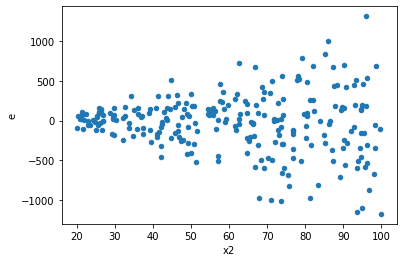

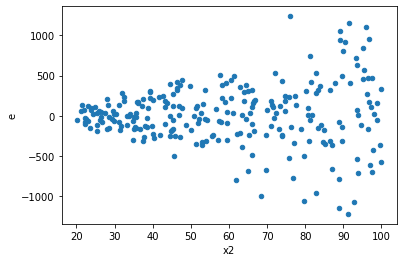

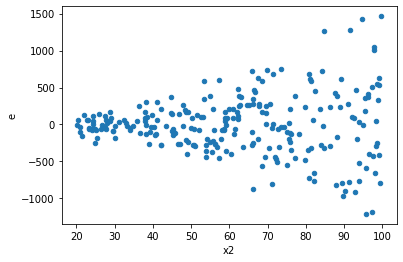

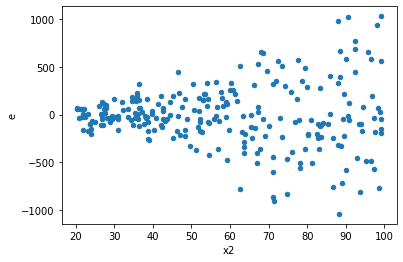

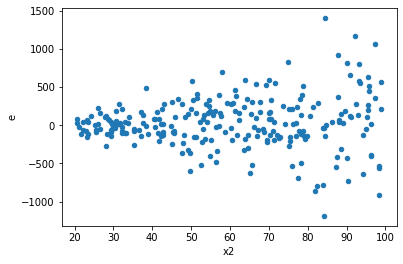

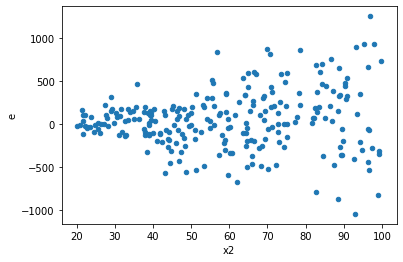

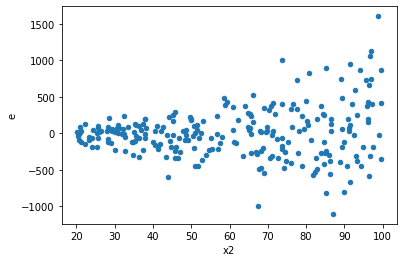

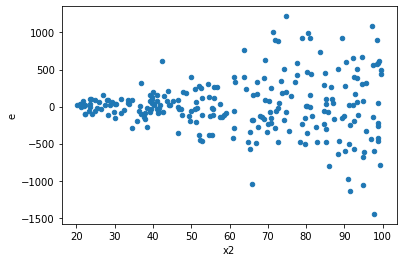

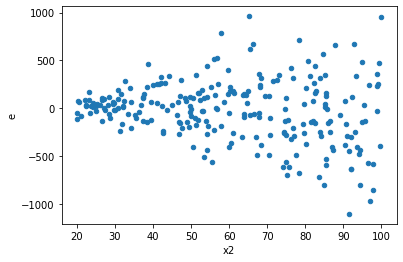

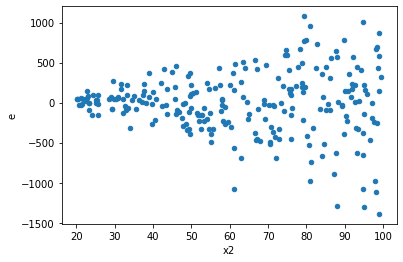

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,105.0,137.0,11837983.531591894,20334821.36348413,112742.70030087518,148429.35301813233,1.316531825315702,0.1307987639143282,0.9346006180428359,0.0653993819571641,Reject001=1 : Homoscedasticity
2.0,112.0,130.0,7499972.641146736,31470805.6793118,66964.04143881015,242083.1206100908,3.615121121853129,4.547695553469566e-12,0.9999999999977262,2.273847776734783e-12,Reject001=0 : Heteroscedasticity
4.0,125.0,117.0,5549952.6125063365,22330537.314248394,44399.62090005069,190859.29328417432,4.298669434899531,2.4202861936828413e-14,0.9999999999999879,1.2101430968414206e-14,Reject001=0 : Heteroscedasticity
5.0,134.0,108.0,9561333.583261216,16897952.21996701,71353.23569597922,156462.5205552501,2.1927880218621514,3.0618673553695075e-05,0.9999846906632232,1.5309336776847537e-05,Reject001=0 : Heteroscedasticity
8.0,136.0,106.0,11210688.869308805,13275522.366937686,82431.53580374121,125240.77704658193,1.5193308704664192,0.024890802304311066,0.9875545988478445,0.012445401152155533,Reject001=1 : Homoscedasticity
12.0,121.0,121.0,9793649.033851583,18827329.053209733,80939.24821364944,155597.76077032837,1.9224018532962932,0.00037635594191898214,0.9998118220290405,0.00018817797095949107,Reject001=0 : Heteroscedasticity
15.0,121.0,121.0,11330247.035798114,18748818.627159733,93638.40525452986,154948.9142740474,1.6547581502788522,0.005959344723258875,0.9970203276383706,0.0029796723616294374,Reject001=0 : Heteroscedasticity
17.0,113.0,129.0,4703751.025981737,28906732.687325623,41626.11527417466,224083.1991265552,5.383235924145414,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
18.0,127.0,115.0,11106082.3975596,15398723.959451133,87449.46769731969,133901.9474734881,1.5311922530729387,0.020571959985598465,0.9897140200072008,0.010285979992799232,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,105.0,137.0,11837983.531591894,20334821.36348413,112742.70030087518,148429.35301813233,1.316531825315702,0.1307987639143282,Reject001=1 : Homoscedasticity
1.0,148.0,94.0,27289463.18645908,6863960.0865570195,184388.26477337215,73020.85198464914,0.3960168076552896,4.307602068781937e-07,Reject001=0 : Heteroscedasticity
2.0,112.0,130.0,7499972.641146736,31470805.6793118,66964.04143881015,242083.1206100908,3.615121121853129,4.547695553469566e-12,Reject001=0 : Heteroscedasticity
3.0,117.0,125.0,20272745.79243795,5523549.381329034,173271.3315592987,44188.39505063227,0.2550242711992414,6.920148707070206e-13,Reject001=0 : Heteroscedasticity
4.0,125.0,117.0,5549952.6125063365,22330537.314248394,44399.62090005069,190859.29328417432,4.298669434899531,2.4202861936828413e-14,Reject001=0 : Heteroscedasticity
5.0,134.0,108.0,9561333.583261216,16897952.21996701,71353.23569597922,156462.5205552501,2.1927880218621514,3.0618673553695075e-05,Reject001=0 : Heteroscedasticity
6.0,106.0,136.0,21658583.264987085,6791486.524605165,204326.2572168593,49937.40091621445,0.244400311523418,6.242467710828169e-13,Reject001=0 : Heteroscedasticity
7.0,126.0,116.0,23149397.17524728,12572574.45993033,183725.37440672447,108384.2625856063,0.5899253869292393,0.0038455195146362424,Reject001=0 : Heteroscedasticity
8.0,136.0,106.0,11210688.869308805,13275522.366937686,82431.53580374121,125240.77704658193,1.5193308704664192,0.024890802304311066,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    586
Reject001=1 : Homoscedasticity      414
Name: Result_test, dtype: int64